### Считаем датасет

In [43]:

import pandas as pd
df = pd.read_csv('datasets_271144_562549_african_crises.csv')
df


,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


Посмотрим описание датасета

In [44]:
df.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


Проверим, есть ли пропуски в данных

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
case                               1059 non-null int64
cc3                                1059 non-null object
country                            1059 non-null object
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
exch_usd                           1059 non-null float64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
gdp_weighted_default               1059 non-null float64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crises                    1059 non-null int64
inflation_crises                   1059 non-null int64
banking_crisis                     1059 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 116.0+ KB


Пропусков в данных нет, это хорошо

Дублированных строк нет, это тоже хорошо

In [53]:
sum(df.duplicated())

0

Заменим наш категориальный признак baтking_crisis на бинарный 

In [47]:
def crisis_to_bin(s):
    if s == "crisis":
        return 1
    elif s == "no_crisis":
        return 0
    
df["banking_crisis"] = df["banking_crisis"].apply(crisis_to_bin)
df

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,0
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,1
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,0
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,0
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,0


### Для начала ответим на вопросы

1) Сколько ввп в среднем у стран с наименьшим количеством кризисов в спокойные годы?  
2) В какой африканской стране кризисы происходят чаще?

Сначала ответим на второй вопрос, т.к. он проще

Создадим столбец, в котором будет хранится количество кризисов в стране в текущем году

In [141]:
df["num_of_crisis"] = df["systemic_crisis"] + df["currency_crises"] + df["inflation_crises"] + df["banking_crisis"]


Создадим словарь, где у каждой страны будем хранить ее название и количество кризисов за тот промежуток, который есть в датасете  
И словарь, который будет хранить количество лет, которые мы знаем для каждоый страны


In [142]:
countries_crisis = {} 
countries_years = {}
cur_cr = 0
year = 0

for i in range(1059):
    if i != 1058 and df["country"].iloc[i] == df["country"].iloc[i+1]:
        cur_cr += df["num_of_crisis"].iloc[i]  
        year+=1
    if (i == 1058) or (df["country"].iloc[i] != df["country"].iloc[i+1]):
        cur_cr += df["num_of_crisis"].iloc[i]   
        year += 1
        countries_crisis[df["country"].iloc[i]] = cur_cr
        countries_years[df["country"].iloc[i]] = year
        cur_cr = 0
        year = 0

In [143]:
countries_crisis # суммарное количество кризисов для каждой страны

{'Algeria': 31,
 'Angola': 55,
 'Central African Republic': 42,
 'Ivory Coast': 13,
 'Egypt': 36,
 'Kenya': 34,
 'Mauritius': 12,
 'Morocco': 22,
 'Nigeria': 43,
 'South Africa': 20,
 'Tunisia': 28,
 'Zambia': 47,
 'Zimbabwe': 70}

In [144]:
countries_years # количество лет, которые мы знаем для нашей страны 

{'Algeria': 85,
 'Angola': 77,
 'Central African Republic': 58,
 'Ivory Coast': 63,
 'Egypt': 155,
 'Kenya': 67,
 'Mauritius': 68,
 'Morocco': 75,
 'Nigeria': 60,
 'South Africa': 114,
 'Tunisia': 75,
 'Zambia': 72,
 'Zimbabwe': 90}

Отлично, теперь создадим словарь с частотой кризисов для каждой страны  
Количество кризисов мы разделим на количество лет

In [145]:
crisis_rate = {}
for country in countries_crisis:
    crisis_rate[country] = countries_crisis[country] / countries_years[country]

In [146]:
crisis_rate # частота кризисов для каждой страны

{'Algeria': 0.36470588235294116,
 'Angola': 0.7142857142857143,
 'Central African Republic': 0.7241379310344828,
 'Ivory Coast': 0.20634920634920634,
 'Egypt': 0.23225806451612904,
 'Kenya': 0.5074626865671642,
 'Mauritius': 0.17647058823529413,
 'Morocco': 0.29333333333333333,
 'Nigeria': 0.7166666666666667,
 'South Africa': 0.17543859649122806,
 'Tunisia': 0.37333333333333335,
 'Zambia': 0.6527777777777778,
 'Zimbabwe': 0.7777777777777778}

Отлично, из этого словаря мы сразу же делаем вывод, что чаще всего кризисы наступают в Зимбабве  
На втором месте у нас Центральная Африканская Республика  
На третьем месте Нигерия

Создадим столбец, в котором будет хранится информация о том, спокойный ли был год, т.е. если не было кризисов, то 1, если были то 0

In [148]:
def is_calm(n):
    if n > 0:
        return 0
    if n == 0:
        return 1

df["calm_year"] = df["num_of_crisis"].apply(is_calm) 
df

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,num_of_crisis,calm_year
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1,2,0
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0,0,1
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0,0,1
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,0,0,1
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,1,3,0
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,0,0,1
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,0,0,1
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,0,0,1


Для каждой страны посчитаем ее среднией ВВП в спокойные годы

In [157]:
mean_gdp = {}
cur_gdp = 0
year = 0

for i in range(1059):
    if (i != 1058) and (df["country"].iloc[i] == df["country"].iloc[i+1]) and (df["calm_year"].iloc[i] == 1):
        cur_gdp += df["gdp_weighted_default"].iloc[i]
        year += 1
    if (i == 1058) or (df["country"].iloc[i] != df["country"].iloc[i+1]):
        if df["calm_year"].iloc[i] == 1:
            cur_gdp += df["gdp_weighted_default"].iloc[i]
            year += 1                                                    
        mean_gdp[df["country"].iloc[i]] = cur_gdp/ year
        cur_gdp = 0
        year = 0
        

In [158]:
mean_gdp

{'Algeria': 0.003484848484848485,
 'Angola': 0.0,
 'Central African Republic': 0.0,
 'Ivory Coast': 0.0,
 'Egypt': 0.01846153846153846,
 'Kenya': 0.0,
 'Mauritius': 0.0,
 'Morocco': 0.011016949152542373,
 'Nigeria': 0.0,
 'South Africa': 0.01136842105263158,
 'Tunisia': 0.006545454545454545,
 'Zambia': 0.0,
 'Zimbabwe': 0.0}

Вспомним, что реже всего происходили кризисы в Южной Африке, Маврикии, Кот Д Вуар  (словарь crisis_rate)  
Средний ВВП в спокойные годы у этих стран соответственно 0.0113694, 0.0, 0.0

## Строим модели

### Попробуем для каждого кризиса научиться его предсказывать
#### Будем пользоваться линейной регрессией

Создадим тестовую выборку

In [346]:
X_test = df[df["country"] == "Nigeria"].iloc[2:52]
X_test.drop(["calm_year", "num_of_crisis"], axis = 1, inplace = True)
# удалим все столбцы с название страны, т.к. от названия страны кризис никак не зависит
X_test.drop(["case", "cc3", "country"], axis = 1, inplace = True)

X_test

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
650,1956,0,0.000000,0,0,0.0,6.862909,0,0,0,0
651,1957,0,0.000000,0,0,0.0,1.546397,0,0,0,0
652,1958,0,0.000000,0,0,0.0,-3.399990,0,0,0,0
653,1959,0,0.000000,0,0,0.0,4.707597,0,0,0,0
654,1960,0,0.000000,0,0,0.0,4.325728,1,0,0,0
655,1961,0,0.000000,0,0,0.0,6.217387,1,0,0,0
656,1962,0,0.000000,0,0,0.0,2.911603,1,0,0,0
657,1963,0,0.000000,0,0,0.0,-1.028492,1,0,0,0
658,1964,0,0.000000,0,0,0.0,0.938031,1,0,0,0
659,1965,0,0.000000,0,0,0.0,4.601492,1,0,0,0


И создадим тренировочную

In [347]:
X_train1 = df.iloc[:650]
X_train2 = df.iloc[700:]
X_train = pd.concat([X_train1, X_train2])
X_train.drop(["case", "cc3", "country", "calm_year", "num_of_crisis"], axis = 1, inplace = True)
X_train

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1
1,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0
2,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0
3,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,0
4,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1054,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,1
1055,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,0
1056,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,0
1057,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,0


### Сначала научимся предсказывать banking crisis

In [348]:
Y_test = X_test["banking_crisis"]
Y_train = X_train["banking_crisis"]
X_test.drop(["banking_crisis"], axis = 1, inplace = True)
X_train.drop(["banking_crisis"], axis = 1, inplace = True)

In [349]:
import numpy as np
import matplotlib.pyplot as plt

Будем улучшать accuarcy  
И вместе с логистической регрессией попробуем обучить ridge классификатор

In [350]:
from sklearn.metrics import roc_auc_score

In [351]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve


logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
accuracy_score(Y_test, y_pred)

/home/alexander/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9

In [352]:
ridge = RidgeClassifier()
ridge.fit(X_train, Y_train)
y_pred = ridge.predict(X_test)
accuracy_score(Y_test, y_pred)

0.98

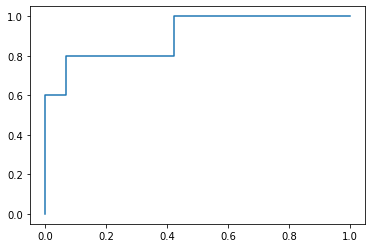

In [353]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
plt.plot(fpr, tpr)

In [354]:
roc_auc_score(Y_test, y_pred_proba)

0.9022222222222221

### Предсказываем systemic_crisis

In [355]:
X_test = X_test.join(Y_test)
X_train = X_train.join(Y_train)

In [356]:
Y_test = X_test["systemic_crisis"]
Y_train = X_train["systemic_crisis"]
X_test.drop(["systemic_crisis"], axis = 1, inplace = True)
X_train.drop(["systemic_crisis"], axis = 1, inplace = True)

In [357]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
accuracy_score(Y_test, y_pred)

/home/alexander/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.98

In [358]:
ridge = RidgeClassifier()
ridge.fit(X_train, Y_train)
y_pred = ridge.predict(X_test)
accuracy_score(Y_test, y_pred)

0.98

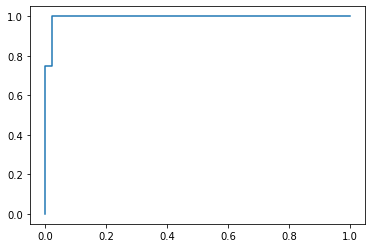

In [359]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
plt.plot(fpr, tpr)

In [360]:
roc_auc_score(Y_test, y_pred_proba)

0.9945652173913043

### Предскажем валютный кризис (currency crisis)

In [361]:
X_test = X_test.join(Y_test)
X_train = X_train.join(Y_train)

In [362]:
Y_test = X_test["currency_crises"]
Y_train = X_train["currency_crises"]
X_test.drop(["currency_crises"], axis = 1, inplace = True)
X_train.drop(["currency_crises"], axis = 1, inplace = True)

In [363]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
accuracy_score(Y_test, y_pred)

/home/alexander/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alexander/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8

Подберем коэффициент регуляризации

In [364]:
alphas = np.arange(0.1, 100, 0.1)

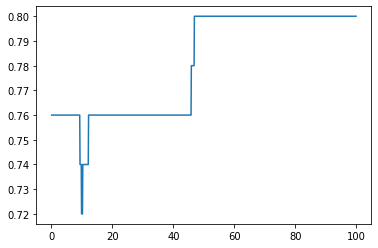

In [365]:
res = []
for i in alphas:
    ridge = RidgeClassifier(alpha = i)
    ridge.fit(X_train, Y_train)
    y_pred = ridge.predict(X_test)    
    res.append(accuracy_score(Y_test, y_pred))
plt.plot(alphas, res)

Лучше чем 0.8 , увы, не получили

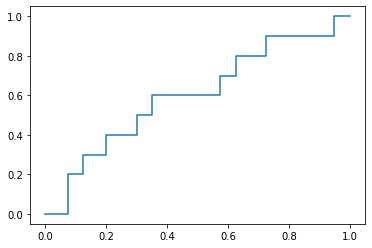

In [366]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
plt.plot(fpr, tpr)

In [367]:
roc_auc_score(Y_test, y_pred_proba)

0.6000000000000001

Да, по ROC кривой видно, что для этого признака наша модель работает плохо

### Предсказываем inflation crisis


In [368]:
X_test = X_test.join(Y_test)
X_train = X_train.join(Y_train)

In [369]:
Y_test = X_test["inflation_crises"]
Y_train = X_train["inflation_crises"]
X_test.drop(["inflation_crises"], axis = 1, inplace = True)
X_train.drop(["inflation_crises"], axis = 1, inplace = True)

In [370]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
accuracy_score(Y_test, y_pred)

/home/alexander/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.84

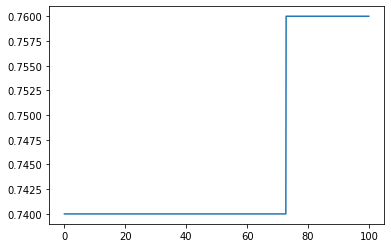

In [371]:
res = []
for i in alphas:
    ridge = RidgeClassifier(alpha = i)
    ridge.fit(X_train, Y_train)
    y_pred = ridge.predict(X_test)    
    res.append(accuracy_score(Y_test, y_pred))
plt.plot(alphas, res)

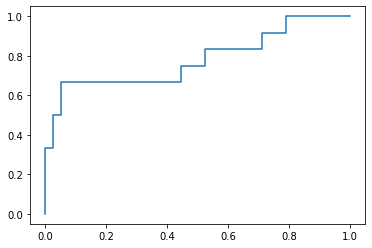

In [372]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
plt.plot(fpr, tpr)

In [373]:
roc_auc_score(Y_test, y_pred_proba)

0.7807017543859649